In [1]:
!pip install catboost

In [64]:
!pip install ngboost

     |████████████████████████████████| 348 kB 47.6 MB/s 
     |████████████████████████████████| 55 kB 4.4 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=c5e07414915cde5a6003cf4c8046868c404c4b7069c9905f3fe130d36e8230c3
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,336 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 148492 files and d

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## 데이터 탐색

In [4]:
from google.colab import files
uploaded = files.upload() 

Saving 세대수포함_전처리재완료.csv to 세대수포함_전처리재완료.csv


In [5]:
df = pd.read_csv("세대수포함_전처리재완료.csv",parse_dates =["DATE"], index_col ="DATE", encoding='euc-kr')
df.rename(columns={'쥬택인허가실적(전국)':'주택인허가실적(전국)'},inplace=True)

In [6]:
df

,전국_세대수,서울특별시_세대수,부산광역시_세대수,대구광역시_세대수,인천광역시_세대수,광주광역시_세대수,대전광역시_세대수,울산광역시_세대수,경기도_세대수,강원도_세대수,충청북도_세대수,충청남도_세대수,전라북도_세대수,전라남도_세대수,경상북도_세대수,경상남도_세대수,제주특별자치도_세대수,월별_google_trend,전국지가지수,월별_정기예금금리,월별_소비자물가지수,"월별_통화량(M2(평잔, 계절조정계열))",월별_환율,월별 아파트 매매현황(동호수)전국,월별 아파트 매매현황(동호수)서울,월별 아파트 매매현황(동호수)부산,월별 아파트 매매현황(동호수)대구,월별 아파트 매매현황(동호수)인천,월별 아파트 매매현황(동호수)광주,월별 아파트 매매현황(동호수)대전,월별 아파트 매매현황(동호수)울산,월별 아파트 매매현황(동호수)경기,월별 아파트 매매현황(동호수)강원,월별 아파트 매매현황(동호수)충북,월별 아파트 매매현황(동호수)충남,월별 아파트 매매현황(동호수)전북,월별 아파트 매매현황(동호수)전남,월별 아파트 매매현황(동호수)경북,월별 아파트 매매현황(동호수)경남,월별 아파트 매매현황(동호수)제주,주택인허가실적(전국),전국_아파트매매가격,수도권_아파트매매가격,지방_아파트매매가격,서울_아파트매매가격,부산_아파트매매가격,대구_아파트매매가격,인천_아파트매매가격,광주_아파트매매가격,대전_아파트매매가격,울산_아파트매매가격,경기_아파트매매가격,강원_아파트매매가격,충북_아파트매매가격,충남_아파트매매가격,전북_아파트매매가격,전남_아파트매매가격,경북_아파트매매가격,경남_아파트매매가격,제주_아파트매매가격,지가지수_전국,지가지수_서울,지가지수_부산,지가지수_대구,지가지수_인천,지가지수_광주,지가지수_대전,지가지수_울산,지가지수_경기,지가지수_강원,지가지수_충북,지가지수_충남,지가지수_전북,지가지수_전남,지가지수_경북,지가지수_경남,지가지수_제주,주택담보대출금리
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01,19869849,4223301,1371509,935007,1060116,541247,556329,406038,4530271,638519,617718,854411,741054,798984,1101294,1269140,224911,51,78.184,3.46,93.070,1674184.6,1114.3,53791,5868,4910,3416,1838,2281,2378,1821,11760,1781,1920,2643,2546,1215,2702,5932,780,18500,286.6,415.2,189.3,611.7,242.8,188.3,283.9,152.1,233.1,208.2,335.8,144.3,165.7,169.7,162.3,132.6,131.8,215.9,169.2,78.184,74.813,72.709,73.076,81.879,77.214,77.490,83.470,79.425,79.587,83.780,85.972,82.537,78.673,81.257,84.108,74.690,4.80
2011-02-01,19891086,4225512,1373295,935938,1062076,542255,557532,406599,4536302,638649,618733,855359,742129,798865,1101908,1270591,225343,43,78.254,3.63,93.707,1675055.2,1127.9,60619,6523,5622,4266,2255,2820,2480,2025,13895,1933,2244,3084,2265,2111,3190,5488,418,19176,271.1,394.5,185.0,584.2,244.7,188.1,282.0,153.8,235.4,202.4,324.9,138.7,156.0,162.1,157.3,132.4,129.1,215.3,162.9,78.254,74.905,72.781,73.175,81.926,77.270,77.578,83.509,79.488,79.635,83.811,86.010,82.575,78.728,81.295,84.194,74.723,4.86
2011-03-01,19906696,4221613,1374241,935956,1063075,542647,558301,407260,4540195,641429,619493,857939,743089,800032,1103224,1272563,225639,34,78.338,3.66,94.072,1679087.2,1107.2,71577,7279,5669,5043,3031,3450,2851,2308,16719,2363,2623,4075,2956,2665,4892,5231,422,32853,254.8,377.5,185.6,566.7,244.5,186.6,276.7,158.6,233.9,197.7,312.5,135.8,156.7,162.5,156.6,130.2,128.3,222.3,179.4,78.338,75.020,72.868,73.273,81.976,77.327,77.648,83.572,79.568,79.677,83.850,86.053,82.618,78.787,81.351,84.267,74.773,4.89
2011-04-01,19923412,4219198,1375107,936270,1064368,543475,558930,407954,4544305,643592,620407,859394,744347,800712,1104535,1274894,225924,37,78.415,3.69,94.163,1686110.4,1072.3,65139,5460,6310,4671,2382,3559,2177,2410,13595,2478,2566,3728,2906,2788,3993,5820,296,41156,249.6,373.0,186.2,570.9,249.6,188.8,272.3,162.3,231.8,204.3,308.8,137.9,158.4,160.6,156.8,130.6,128.6,223.4,188.8,78.415,75.107,72.962,73.341,82.027,77.382,77.706,83.655,79.659,79.719,83.886,86.089,82.662,78.842,81.416,84.333,74.832,4.88
2011-05-01,19935590,4214866,1376830,936704,1065565,544285,560058,408484,4547939,644038,621172,860847,745441,801163,1105615,1276385,226198,37,78.491,3.67,94.345,1694221.7,1080.6,59403,4654,5209,4313,2072,2879,1913,2444,12159,2520,2188,4786,3479,1960,3211,5383,233,32716,255.4,375.7,190.1,573.6,252.9,194.6,273.3,167.1,247.5,211.5,313.0,138.6,164.3,163.3,162.4,127.3,129.9,217.9,181.8,78.491,75.173,73.050,73.410,82.079,77.432,77.876,83.729,79.758,79.758,83.924,86.150,82.701,78.902,81.491,84.404,74.896,4.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,23093108,4417954,1530431,1056627,1267956,633582,652783,476893,5676401,736301,745644,983153,836660,893152,1254662,1484601,302033,37

In [6]:
df.columns

Index(['전국_세대수', '서울특별시_세대수', '부산광역시_세대수', '대구광역시_세대수', '인천광역시_세대수',
       '광주광역시_세대수', '대전광역시_세대수', '울산광역시_세대수', '경기도_세대수', '강원도_세대수', '충청북도_세대수',
       '충청남도_세대수', '전라북도_세대수', '전라남도_세대수', '경상북도_세대수', '경상남도_세대수',
       '제주특별자치도_세대수', '월별_google_trend', '전국지가지수', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율', '월별 아파트 매매현황(동호수)전국',
       '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '주택인허가실적(전국)', '전국_아파트매매가격', '수도권_아파트매매가격',
       '지방_아파트매매가격', '서울_아파트매매가격', '부산_아파트매매가격', '대구_아파트매매가격', '인천_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격', '강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '

### 데이터 탐색(상관관계)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


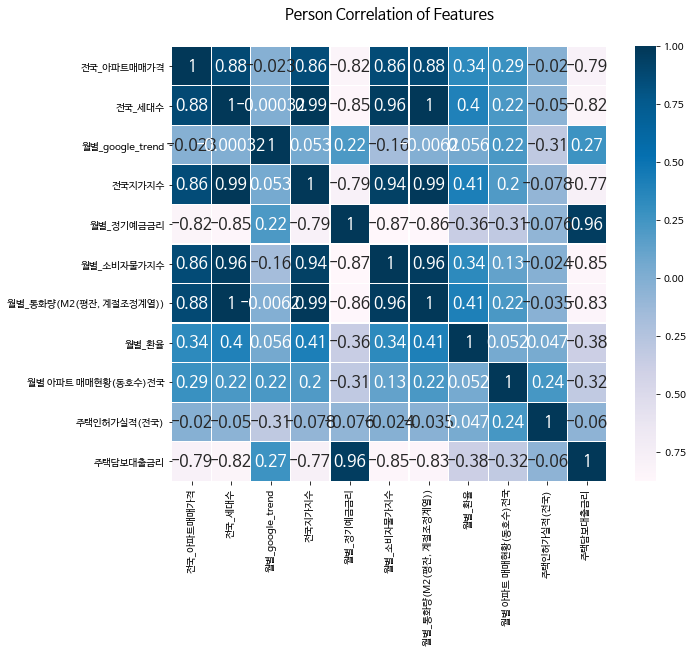

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

heatmap_data = df[['전국_아파트매매가격','전국_세대수','월별_google_trend','전국지가지수', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율', '월별 아파트 매매현황(동호수)전국',
        '주택인허가실적(전국)', '주택담보대출금리']]
colormap = plt.cm.PuBu 
plt.figure(figsize=(10, 8)) 
plt.title("Person Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, 
            square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [8]:
heatmap_data.describe()

,전국_아파트매매가격,전국_세대수,월별_google_trend,전국지가지수,월별_정기예금금리,월별_소비자물가지수,"월별_통화량(M2(평잔, 계절조정계열))",월별_환율,월별 아파트 매매현황(동호수)전국,주택인허가실적(전국),주택담보대출금리
count,124.000000,1.240000e+02,124.000000,124.000000,124.000000,124.000000,1.240000e+02,124.000000,124.000000,124.000000,124.000000
mean,357.277419,2.121470e+07,30.604839,86.929081,2.112742,100.949726,2.323166e+06,1124.169355,55862.903226,47468.387097,3.452823
std,76.340343,9.663315e+05,5.215391,7.430320,0.871772,3.612826,4.644117e+05,48.770673,16884.996526,23691.026540,0.772765
min,249.600000,1.986985e+07,24.000000,78.184000,0.800000,93.070000,1.674185e+06,1013.600000,16968.000000,0.000000,2.390000
25%,290.150000,2.036832e+07,27.000000,80.254000,1.517500,98.139500,1.886823e+06,1087.350000,44907.000000,33363.000000,2.915000
50%,344.300000,2.107091e+07,29.500000,84.626000,1.805000,100.580000,2.290288e+06,1121.750000,55340.500000,41863.500000,3.285000
75%,413.475000,2.194111e+07,33.000000,92.971750,2.630000,104.385000,2.659441e+06,1154.550000,64689.500000,52204.000000,3.777500
max,532.600000,2.319866e+07,51.000000,102.601000,3.790000,107.390000,3.363623e+06,1239.400000,106027.000000,160988.000000,5.060000


### 데이터 탐색(기초통계)

##XGBoost 통한 서울 아파트 매매가 예측

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124 entries, 2011-01-01 to 2021-04-01
Data columns (total 78 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   전국_세대수                  124 non-null    int64  
 1   서울특별시_세대수               124 non-null    int64  
 2   부산광역시_세대수               124 non-null    int64  
 3   대구광역시_세대수               124 non-null    int64  
 4   인천광역시_세대수               124 non-null    int64  
 5   광주광역시_세대수               124 non-null    int64  
 6   대전광역시_세대수               124 non-null    int64  
 7   울산광역시_세대수               124 non-null    int64  
 8   경기도_세대수                 124 non-null    int64  
 9   강원도_세대수                 124 non-null    int64  
 10  충청북도_세대수                124 non-null    int64  
 11  충청남도_세대수                124 non-null    int64  
 12  전라북도_세대수                124 non-null    int64  
 13  전라남도_세대수                124 non-null    int64  
 14  경상북도_세대수               

In [559]:
df_Seoul = df[['경기_아파트매매가격','경기도_세대수','월별_google_trend','지가지수_경기', 
          '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율', '월별 아파트 매매현황(동호수)경기',
        '주택인허가실적(전국)', '주택담보대출금리']]

In [531]:
for s in range(1,7):
    df_Seoul['서울_아파트매매가격_{}'.format(s)] = df_Seoul['서울_아파트매매가격'].shift(s)
    df_Seoul['월별_환율_{}'.format(s)] = df_Seoul['월별_환율'].shift(s)
    df_Seoul['월별_google_trend_{}'.format(s)] = df_Seoul['월별_google_trend'].shift(s)
    df_Seoul['지가지수_서울_{}'.format(s)] = df_Seoul['지가지수_서울'].shift(s)
    df_Seoul['월별_정기예금금리_{}'.format(s)] = df_Seoul['월별_정기예금금리'].shift(s)
    df_Seoul['월별_통화량(M2(평잔, 계절조정계열))_{}'.format(s)] = df_Seoul['월별_통화량(M2(평잔, 계절조정계열))'].shift(s)
    df_Seoul['월별 아파트 매매현황(동호수)서울_{}'.format(s)] = df_Seoul['월별 아파트 매매현황(동호수)서울'].shift(s)
    df_Seoul['주택인허가실적(전국)_{}'.format(s)] = df_Seoul['주택인허가실적(전국)'].shift(s)
    df_Seoul['월별_소비자물가지수_{}'.format(s)] = df_Seoul['월별_소비자물가지수'].shift(s)
    df_Seoul['주택담보대출금리_{}'.format(s)] = df_Seoul['주택담보대출금리'].shift(s)
    df_Seoul['서울특별시_세대수_{}'.format(s)] = df_Seoul['서울특별시_세대수'].shift(s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [532]:
split_date = pd.Timestamp('01-01-2021')
train = df_Seoul.loc[:split_date]
test = df_Seoul.loc[split_date:]

In [533]:
X_train = train.dropna().drop('서울_아파트매매가격', axis=1)
y_train = train.dropna()[['서울_아파트매매가격']]


X_train = X_train.dropna().drop('월별_환율', axis=1)
X_train = X_train.dropna().drop('월별_google_trend', axis=1)
X_train = X_train.dropna().drop('지가지수_서울', axis=1)
X_train = X_train.dropna().drop('월별_정기예금금리', axis=1)
X_train = X_train.dropna().drop('월별_소비자물가지수', axis=1)
X_train = X_train.dropna().drop('월별_통화량(M2(평잔, 계절조정계열))', axis=1)
X_train = X_train.dropna().drop('월별 아파트 매매현황(동호수)서울', axis=1)
X_train = X_train.dropna().drop('주택인허가실적(전국)', axis=1)
X_train = X_train.dropna().drop('주택담보대출금리', axis=1)
X_train = X_train.dropna().drop('서울특별시_세대수', axis=1)


X_test = test.dropna().drop('서울_아파트매매가격', axis=1)
y_test = test.dropna()[['서울_아파트매매가격']]


X_test = X_test.dropna().drop('월별_환율', axis=1)
X_test = X_test.dropna().drop('월별_google_trend', axis=1)
X_test = X_test.dropna().drop('지가지수_서울', axis=1)
X_test = X_test.dropna().drop('월별_정기예금금리', axis=1)
X_test = X_test.dropna().drop('월별_소비자물가지수', axis=1)
X_test = X_test.dropna().drop('월별_통화량(M2(평잔, 계절조정계열))', axis=1)
X_test = X_test.dropna().drop('월별 아파트 매매현황(동호수)서울', axis=1)
X_test = X_test.dropna().drop('주택인허가실적(전국)', axis=1)
X_test = X_test.dropna().drop('주택담보대출금리', axis=1)
X_test = X_test.dropna().drop('서울특별시_세대수', axis=1)

In [534]:
X_train

,서울_아파트매매가격_1,월별_환율_1,월별_google_trend_1,지가지수_서울_1,월별_정기예금금리_1,"월별_통화량(M2(평잔, 계절조정계열))_1",월별 아파트 매매현황(동호수)서울_1,주택인허가실적(전국)_1,월별_소비자물가지수_1,주택담보대출금리_1,서울특별시_세대수_1,서울_아파트매매가격_2,월별_환율_2,월별_google_trend_2,지가지수_서울_2,월별_정기예금금리_2,"월별_통화량(M2(평잔, 계절조정계열))_2",월별 아파트 매매현황(동호수)서울_2,주택인허가실적(전국)_2,월별_소비자물가지수_2,주택담보대출금리_2,서울특별시_세대수_2,서울_아파트매매가격_3,월별_환율_3,월별_google_trend_3,지가지수_서울_3,월별_정기예금금리_3,"월별_통화량(M2(평잔, 계절조정계열))_3",월별 아파트 매매현황(동호수)서울_3,주택인허가실적(전국)_3,월별_소비자물가지수_3,주택담보대출금리_3,서울특별시_세대수_3,서울_아파트매매가격_4,월별_환율_4,월별_google_trend_4,지가지수_서울_4,월별_정기예금금리_4,"월별_통화량(M2(평잔, 계절조정계열))_4",월별 아파트 매매현황(동호수)서울_4,주택인허가실적(전국)_4,월별_소비자물가지수_4,주택담보대출금리_4,서울특별시_세대수_4,서울_아파트매매가격_5,월별_환율_5,월별_google_trend_5,지가지수_서울_5,월별_정기예금금리_5,"월별_통화량(M2(평잔, 계절조정계열))_5",월별 아파트 매매현황(동호수)서울_5,주택인허가실적(전국)_5,월별_소비자물가지수_5,주택담보대출금리_5,서울특별시_세대수_5,서울_아파트매매가격_6,월별_환율_6,월별_google_trend_6,지가지수_서울_6,월별_정기예금금리_6,"월별_통화량(M2(평잔, 계절조정계열))_6",월별 아파트 매매현황(동호수)서울_6,주택인허가실적(전국)_6,월별_소비자물가지수_6,주택담보대출금리_6,서울특별시_세대수_6
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-07-01,576.8,1078.1,32.0,75.229,3.72,1697684.4,4467.0,31866.0,94.527,4.87,4210104.0,573.6,1080.6,37.0,75.173,3.67,1694221.7,4654.0,32716.0,94.345,4.90,4214866.0,570.9,1072.3,37.0,75.107,3.69,1686110.4,5460.0,41156.0,94.163,4.88,4219198.0,566.7,1107.2,34.0,75.020,3.66,1679087.2,7279.0,32853.0,94.072,4.89,4221613.0,584.2,1127.9,43.0,74.905,3.63,1675055.2,6523.0,19176.0,93.707,4.86,4225512.0,611.7,1114.3,51.0,74.813,3.46,1674184.6,5868.0,18500.0,93.070,4.80,4223301.0
2011-08-01,614.5,1052.6,34.0,75.279,3.79,1705385.6,4096.0,37878.0,94.982,4.90,4206353.0,576.8,1078.1,32.0,75.229,3.72,1697684.4,4467.0,31866.0,94.527,4.87,4210104.0,573.6,1080.6,37.0,75.173,3.67,1694221.7,4654.0,32716.0,94.345,4.90,4214866.0,570.9,1072.3,37.0,75.107,3.69,1686110.4,5460.0,41156.0,94.163,4.88,4219198.0,566.7,1107.2,34.0,75.020,3.66,1679087.2,7279.0,32853.0,94.072,4.89,4221613.0,584.2,1127.9,43.0,74.905,3.63,1675055.2,6523.0,19176.0,93.707,4.86,4225512.0
2011-09-01,571.5,1071.7,31.0,75.318,3.76,1719535.1,4931.0,40856.0,95.620,4.97,4204155.0,614.5,1052.6,34.0,75.279,3.79,1705385.6,4096.0,37878.0,94.982,4.90,4206353.0,576.8,1078.1,32.0,75.229,3.72,1697684.4,4467.0,31866.0,94.527,4.87,4210104.0,573.6,1080.6,37.0,75.173,3.67,1694221.7,4654.0,32716.0,94.345,4.90,4214866.0,570.9,1072.3,37.0,75.107,3.69,1686110.4,5460.0,41156.0,94.163,4.88,4219198.0,566.7,1107.2,34.0,75.020,3.66,1679087.2,7279.0,32853.0,94.072,4.89,4221613.0
2011-10-01,577.3,1179.5,36.0,75.355,3.71,1729897.0,4868.0,44251.0,95.529,5.00,4201510.0,571.5,1071.7,31.0,75.318,3.76,1719535.1,4931.0,40856.0,95.620,4.97,4204155.0,614.5,1052.6,34.0,75.279,3.79,1705385.6,4096.0,37878.0,94.982,4.90,4206353.0,576.8,1078.1,32.0,75.229,3.72,1697684.4,4467.0,31866.0,94.527,4.87,4210104.0,573.6,1080.6,37.0,75.173,3.67,1694221.7,4654.0,32716.0,94.345,4.90,4214866.0,570.9,1072.3,37.0,75.107,3.69,1686110.4,5460.0,41156.0,94.163,4.88,4219198.0
2011-11-01,592.3,1104.5,33.0,75.387,3.70,1741703.8,4701.0,60027.0,95.347,5.01,4199109.0,577.3,1179.5,36.0,75.355,3.71,1729897.0,4868.0,44251.0,95.529,5.00,4201510.0,571.5,1071.7,31.0,75.318,3.76,1719535.1,4931.0,40856.0,95.620,4.97,4204155.0,614.5,1052.6,34.0,75.279,3.79,1705385.6,4096.0,37878.0,94.982,4.90,4206353.0,576.8,1078.1,32.0,75.229,3.72,1697684.4,4467.0,31866.0,94.527,4.87,4210104.0,573.6,1080.6,37.0,75.173,3.67,1694221.7,4654.0,32716.0,94.345,4.90,4214866.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01,1211.2,1185.1,37.0,100.000,0.80,3105178.6,6880.0,28268.0,105.500,2.39,4400154.0,1122.0,1191.4,46.0,99.582,0.80,3093227.7,16002.0,40178.0,104.860,2.45,4391545.0,1116.2,1200.7,36.0,99.158,0.88,3074375.1,11106.0,33079.0,104.870,2.49,4384076.0,1048.6,1239.4,32.0,98.789,1.07,3051094.3,4328.0,28279.0,104.710,2.52,4373610.0,947.7,1225.

In [535]:
X_test

,서울_아파트매매가격_1,월별_환율_1,월별_google_trend_1,지가지수_서울_1,월별_정기예금금리_1,"월별_통화량(M2(평잔, 계절조정계열))_1",월별 아파트 매매현황(동호수)서울_1,주택인허가실적(전국)_1,월별_소비자물가지수_1,주택담보대출금리_1,서울특별시_세대수_1,서울_아파트매매가격_2,월별_환율_2,월별_google_trend_2,지가지수_서울_2,월별_정기예금금리_2,"월별_통화량(M2(평잔, 계절조정계열))_2",월별 아파트 매매현황(동호수)서울_2,주택인허가실적(전국)_2,월별_소비자물가지수_2,주택담보대출금리_2,서울특별시_세대수_2,서울_아파트매매가격_3,월별_환율_3,월별_google_trend_3,지가지수_서울_3,월별_정기예금금리_3,"월별_통화량(M2(평잔, 계절조정계열))_3",월별 아파트 매매현황(동호수)서울_3,주택인허가실적(전국)_3,월별_소비자물가지수_3,주택담보대출금리_3,서울특별시_세대수_3,서울_아파트매매가격_4,월별_환율_4,월별_google_trend_4,지가지수_서울_4,월별_정기예금금리_4,"월별_통화량(M2(평잔, 계절조정계열))_4",월별 아파트 매매현황(동호수)서울_4,주택인허가실적(전국)_4,월별_소비자물가지수_4,주택담보대출금리_4,서울특별시_세대수_4,서울_아파트매매가격_5,월별_환율_5,월별_google_trend_5,지가지수_서울_5,월별_정기예금금리_5,"월별_통화량(M2(평잔, 계절조정계열))_5",월별 아파트 매매현황(동호수)서울_5,주택인허가실적(전국)_5,월별_소비자물가지수_5,주택담보대출금리_5,서울특별시_세대수_5,서울_아파트매매가격_6,월별_환율_6,월별_google_trend_6,지가지수_서울_6,월별_정기예금금리_6,"월별_통화량(M2(평잔, 계절조정계열))_6",월별 아파트 매매현황(동호수)서울_6,주택인허가실적(전국)_6,월별_소비자물가지수_6,주택담보대출금리_6,서울특별시_세대수_6
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-01,1351.5,1088.0,37.0,101.624,0.89,3191519.6,8764.0,96803.0,105.67,2.59,4417954.0,1291.8,1104.4,40.0,101.182,0.89,3178652.3,4725.0,34474.0,105.50,2.56,4412343.0,1202.9,1133.4,35.0,100.774,0.87,3151288.9,4320.0,33257.0,105.61,2.47,4408498.0,1216.1,1173.5,31.0,100.398,0.87,3119022.8,4795.0,35686.0,106.20,2.44,4405833.0,1211.2,1185.1,37.0,100.000,0.80,3105178.6,6880.0,28268.0,105.50,2.39,4400154.0,1122.0,1191.4,46.0,99.582,0.80,3093227.7,16002.0,40178.0,104.86,2.45,4391545.0
2021-02-01,1335.1,1114.6,41.0,102.039,0.85,3232659.8,5945.0,26183.0,106.47,2.63,4421022.0,1351.5,1088.0,37.0,101.624,0.89,3191519.6,8764.0,96803.0,105.67,2.59,4417954.0,1291.8,1104.4,40.0,101.182,0.89,3178652.3,4725.0,34474.0,105.50,2.56,4412343.0,1202.9,1133.4,35.0,100.774,0.87,3151288.9,4320.0,33257.0,105.61,2.47,4408498.0,1216.1,1173.5,31.0,100.398,0.87,3119022.8,4795.0,35686.0,106.20,2.44,4405833.0,1211.2,1185.1,37.0,100.000,0.80,3105178.6,6880.0,28268.0,105.50,2.39,4400154.0
2021-03-01,1309.5,1108.4,37.0,102.466,0.83,3274417.0,5435.0,33647.0,107.00,2.66,4427814.0,1335.1,1114.6,41.0,102.039,0.85,3232659.8,5945.0,26183.0,106.47,2.63,4421022.0,1351.5,1088.0,37.0,101.624,0.89,3191519.6,8764.0,96803.0,105.67,2.59,4417954.0,1291.8,1104.4,40.0,101.182,0.89,3178652.3,4725.0,34474.0,105.50,2.56,4412343.0,1202.9,1133.4,35.0,100.774,0.87,3151288.9,4320.0,33257.0,105.61,2.47,4408498.0,1216.1,1173.5,31.0,100.398,0.87,3119022.8,4795.0,35686.0,106.20,2.44,4405833.0
2021-04-01,1281.2,1133.5,37.0,102.909,0.83,3313090.6,4495.0,45354.0,107.16,2.73,4400403.0,1309.5,1108.4,37.0,102.466,0.83,3274417.0,5435.0,33647.0,107.00,2.66,4427814.0,1335.1,1114.6,41.0,102.039,0.85,3232659.8,5945.0,26183.0,106.47,2.63,4421022.0,1351.5,1088.0,37.0,101.624,0.89,3191519.6,8764.0,96803.0,105.67,2.59,4417954.0,1291.8,1104.4,40.0,101.182,0.89,3178652.3,4725.0,34474.0,105.50,2.56,4412343.0,1202.9,1133.4,35.0,100.774,0.87,3151288.9,4320.0,33257.0,105.61,2.47,4408498.0


In [536]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

rf_model= RandomForestRegressor(n_estimators=10000)

In [537]:
XGB_model = XGBRegressor(objective = 'reg:linear',
                         n_estimators=10000,learning_rate=0.04,max_depth=4)
                    #  learning_rate=0.2, max_depth=4,
                    #  subsample=0.7,
                    #  colsample_bytree = 0.7)

In [506]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [538]:
# xgb 활용
XGB_model.fit(X_train, y_train)

[09:06:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.04, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [539]:
from sklearn.metrics import mean_absolute_error
y_pred = XGB_model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'xgb 훈련 에러: {mae:.2f}')

xgb 훈련 에러: 0.00


In [540]:
y_pred_XGB = XGB_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_XGB)
print(f'xgb 테스트 에러: {mae:.2f}')

xgb 테스트 에러: 28.25


In [529]:
y_pred

array([ 614.4987 ,  571.5013 ,  577.3012 ,  592.2992 ,  588.1015 ,
        609.4988 ,  575.6991 ,  570.5998 ,  564.7003 ,  583.3998 ,
        592.8991 ,  557.2011 ,  548.8981 ,  534.80115,  563.39923,
        571.5023 ,  574.0989 ,  575.4003 ,  577.2011 ,  578.3991 ,
        563.3001 ,  567.89886,  553.70013,  546.19965,  507.80188,
        533.79944,  534.90015,  546.50055,  569.2995 ,  603.8986 ,
        588.8996 ,  576.6001 ,  548.8023 ,  553.39984,  558.29987,
        567.6007 ,  582.9998 ,  593.29834,  583.0001 ,  580.2995 ,
        567.602  ,  589.19836,  585.2002 ,  589.19916,  590.8013 ,
        601.19867,  608.8994 ,  599.6013 ,  604.69934,  595.20074,
        616.49976,  644.6005 ,  666.7973 ,  627.6013 ,  615.99915,
        614.00183,  639.1992 ,  682.4009 ,  689.7997 ,  677.0996 ,
        657.60175,  687.29913,  692.3998 ,  688.49976,  649.1003 ,
        666.5999 ,  694.4005 ,  710.09937,  716.1001 ,  752.1004 ,
        786.89923,  723.6993 ,  767.1999 ,  704.20276,  796.59

In [541]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_test, y_pred_XGB)**0.5
print(f'xgb 테스트 RMSE: {RMSE:.2f}')

xgb 테스트 RMSE: 34.11


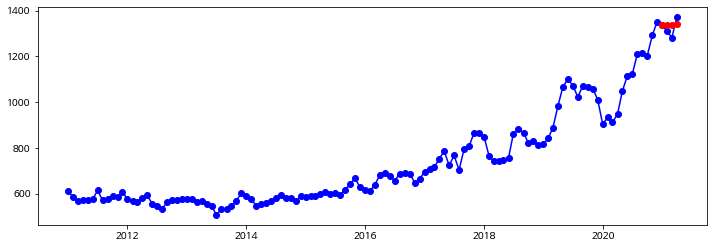

In [542]:
fig = plt.figure(figsize = (12, 4)) 
y_pred = XGB_model.predict(X_test)
y_pred = pd.DataFrame(y_pred, index=X_test.index)
#pd.DataFrame(train_sc, index=train.index)
#print(y_pred2)
plt.plot(df_Seoul['서울_아파트매매가격'], 'o-', label='real_value',color='blue')
#plt.xticks(X_test.index)
plt.plot(y_pred, 'o-', label='predicted',color='red')

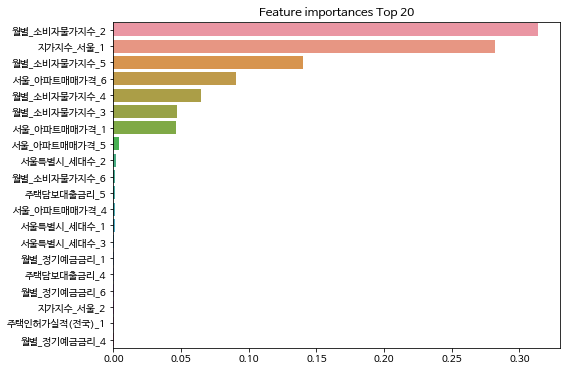

In [469]:
import matplotlib.pyplot as plt
import seaborn as sns


importances_values = XGB_model.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

In [470]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(XGB_model, random_state = 42).fit(X_test, y_test) 
eli5.show_weights(perm, top = 20, feature_names = X_test.columns.tolist())

Weight,Feature
0.0248 ± 0.0345,월별 아파트 매매현황(동호수)서울_3
0.0209 ± 0.0664,서울_아파트매매가격_1
0.0196 ± 0.0245,주택인허가실적(전국)_5
0.0122 ± 0.0736,월별_google_trend_1
0.0079 ± 0.0164,주택인허가실적(전국)_3
0.0069 ± 0.0351,월별_소비자물가지수_1
0.0059 ± 0.0122,월별_정기예금금리_1
0.0055 ± 0.0042,주택인허가실적(전국)_2
0.0048 ± 0.0050,월별_환율_1
0.0037 ± 0.0201,주택인허가실적(전국)_1


In [471]:
plt.rcParams['figure.figsize'] = [40, 20]

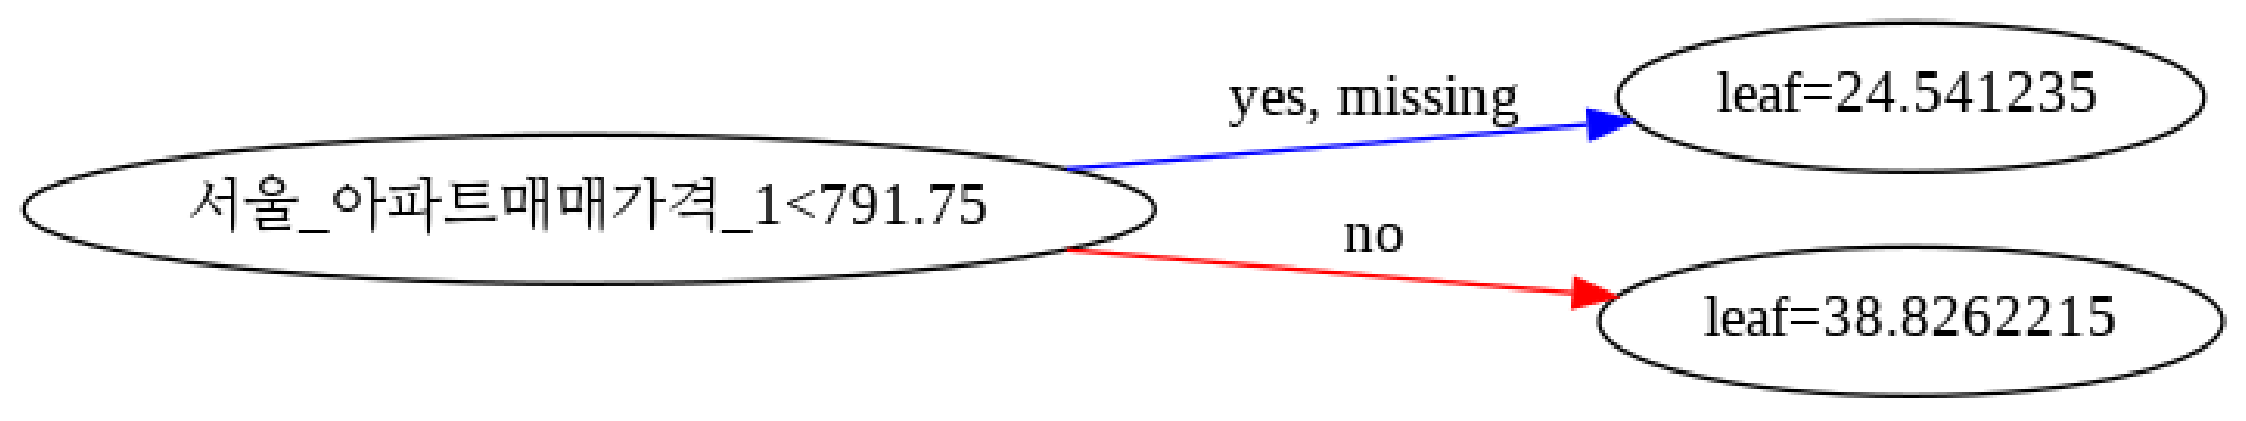

In [487]:
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from xgboost import plot_tree
#plot_tree(XGB_model,num_trees=10)

plot_tree(XGB_model, num_trees=0, rankdir='LR')
plt.show()

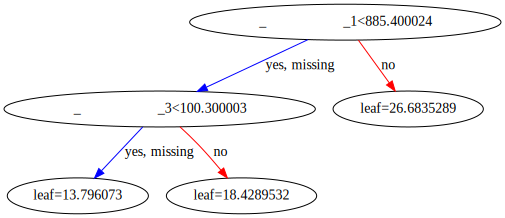

In [486]:
xgb.to_graphviz(XGB_model, num_trees=12)



---



##XGBoost를 통한  경기도 아파트 매매가 예측

In [ ]:
df.info()

In [560]:
df_Kyungki = df[['경기_아파트매매가격','경기도_세대수','월별_google_trend','지가지수_경기', 
          '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율', '월별 아파트 매매현황(동호수)경기',
        '주택인허가실적(전국)', '주택담보대출금리']]

In [561]:
for s in range(1,7):
    df_Kyungki['경기_아파트매매가격_{}'.format(s)] = df_Kyungki['경기_아파트매매가격'].shift(s)
    df_Kyungki['월별_환율_{}'.format(s)] = df_Kyungki['월별_환율'].shift(s)
    df_Kyungki['월별_google_trend_{}'.format(s)] = df_Kyungki['월별_google_trend'].shift(s)
    df_Kyungki['지가지수_경기_{}'.format(s)] = df_Kyungki['지가지수_경기'].shift(s)
    df_Kyungki['월별_정기예금금리_{}'.format(s)] = df_Kyungki['월별_정기예금금리'].shift(s)
    df_Kyungki['월별_통화량(M2(평잔, 계절조정계열))_{}'.format(s)] = df_Kyungki['월별_통화량(M2(평잔, 계절조정계열))'].shift(s)
    df_Kyungki['월별 아파트 매매현황(동호수)경기_{}'.format(s)] = df_Kyungki['월별 아파트 매매현황(동호수)경기'].shift(s)
    df_Kyungki['주택인허가실적(전국)_{}'.format(s)] = df_Kyungki['주택인허가실적(전국)'].shift(s)
    df_Kyungki['월별_소비자물가지수_{}'.format(s)] = df_Kyungki['월별_소비자물가지수'].shift(s)
    df_Kyungki['주택담보대출금리_{}'.format(s)] = df_Kyungki['주택담보대출금리'].shift(s)
    df_Kyungki['경기도_세대수_{}'.format(s)] = df_Kyungki['경기도_세대수'].shift(s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [562]:
split_date = pd.Timestamp('01-01-2021')
train = df_Kyungki.loc[:split_date]
test = df_Kyungki.loc[split_date:]

In [563]:
X_train = train.dropna().drop('경기_아파트매매가격', axis=1)
y_train = train.dropna()[['경기_아파트매매가격']]


X_train = X_train.dropna().drop('월별_환율', axis=1)
X_train = X_train.dropna().drop('월별_google_trend', axis=1)
X_train = X_train.dropna().drop('지가지수_경기', axis=1)
X_train = X_train.dropna().drop('월별_정기예금금리', axis=1)
X_train = X_train.dropna().drop('월별_소비자물가지수', axis=1)
X_train = X_train.dropna().drop('월별_통화량(M2(평잔, 계절조정계열))', axis=1)
X_train = X_train.dropna().drop('월별 아파트 매매현황(동호수)경기', axis=1)
X_train = X_train.dropna().drop('주택인허가실적(전국)', axis=1)
X_train = X_train.dropna().drop('주택담보대출금리', axis=1)
X_train = X_train.dropna().drop('경기도_세대수', axis=1)


X_test = test.dropna().drop('경기_아파트매매가격', axis=1)
y_test = test.dropna()[['경기_아파트매매가격']]


X_test = X_test.dropna().drop('월별_환율', axis=1)
X_test = X_test.dropna().drop('월별_google_trend', axis=1)
X_test = X_test.dropna().drop('지가지수_경기', axis=1)
X_test = X_test.dropna().drop('월별_정기예금금리', axis=1)
X_test = X_test.dropna().drop('월별_소비자물가지수', axis=1)
X_test = X_test.dropna().drop('월별_통화량(M2(평잔, 계절조정계열))', axis=1)
X_test = X_test.dropna().drop('월별 아파트 매매현황(동호수)경기', axis=1)
X_test = X_test.dropna().drop('주택인허가실적(전국)', axis=1)
X_test = X_test.dropna().drop('주택담보대출금리', axis=1)
X_test = X_test.dropna().drop('경기도_세대수', axis=1)

In [564]:
XGB_model = XGBRegressor(objective = 'reg:linear',
                         n_estimators=10000,learning_rate=0.04,max_depth=4)
                    #  learning_rate=0.2, max_depth=4,
                    #  subsample=0.7,
                    #  colsample_bytree = 0.7)

In [565]:
# xgb 활용
XGB_model.fit(X_train, y_train)

[09:32:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.04, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [566]:
from sklearn.metrics import mean_absolute_error
y_pred = XGB_model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'xgb 훈련 에러: {mae:.2f}')

xgb 훈련 에러: 0.00


In [567]:
y_pred_XGB = XGB_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_XGB)
print(f'xgb 테스트 에러: {mae:.2f}')

xgb 테스트 에러: 12.75


In [568]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_test, y_pred_XGB)**0.5
print(f'xgb 테스트 RMSE: {RMSE:.2f}')

xgb 테스트 RMSE: 15.27


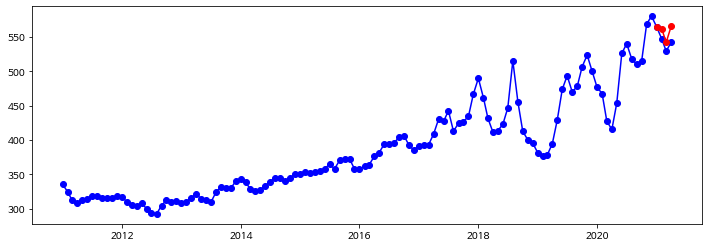

In [569]:
fig = plt.figure(figsize = (12, 4)) 
y_pred = XGB_model.predict(X_test)
y_pred = pd.DataFrame(y_pred, index=X_test.index)
#pd.DataFrame(train_sc, index=train.index)
#print(y_pred2)
plt.plot(df_Kyungki['경기_아파트매매가격'], 'o-', label='real_value',color='blue')
#plt.xticks(X_test.index)
plt.plot(y_pred, 'o-', label='predicted',color='red')

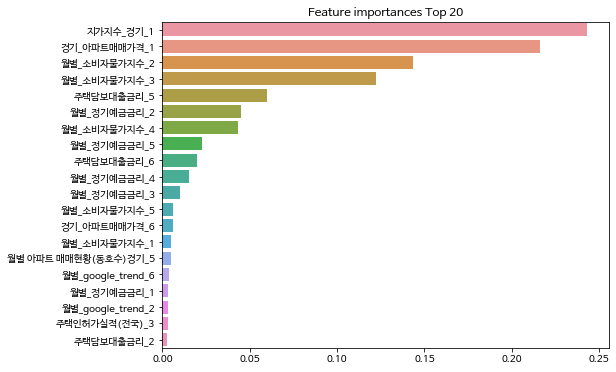

In [570]:
import matplotlib.pyplot as plt
import seaborn as sns


importances_values = XGB_model.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

In [571]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(XGB_model, random_state = 42).fit(X_test, y_test) 
eli5.show_weights(perm, top = 20, feature_names = X_test.columns.tolist())

Weight,Feature
0.9545 ± 1.7008,주택인허가실적(전국)_3
0.0604 ± 0.0263,월별 아파트 매매현황(동호수)경기_6
0.0400 ± 0.0944,월별_google_trend_1
0.0314 ± 0.1064,주택인허가실적(전국)_2
0.0297 ± 0.0513,주택인허가실적(전국)_5
0.0191 ± 0.0245,주택인허가실적(전국)_4
0.0185 ± 0.0170,월별_환율_1
0.0144 ± 0.0364,월별_환율_3
0.0059 ± 0.0070,월별_정기예금금리_1
0.0046 ± 0.0135,월별_환율_5


In [ ]:
plt.rcParams['figure.figsize'] = [40, 20]

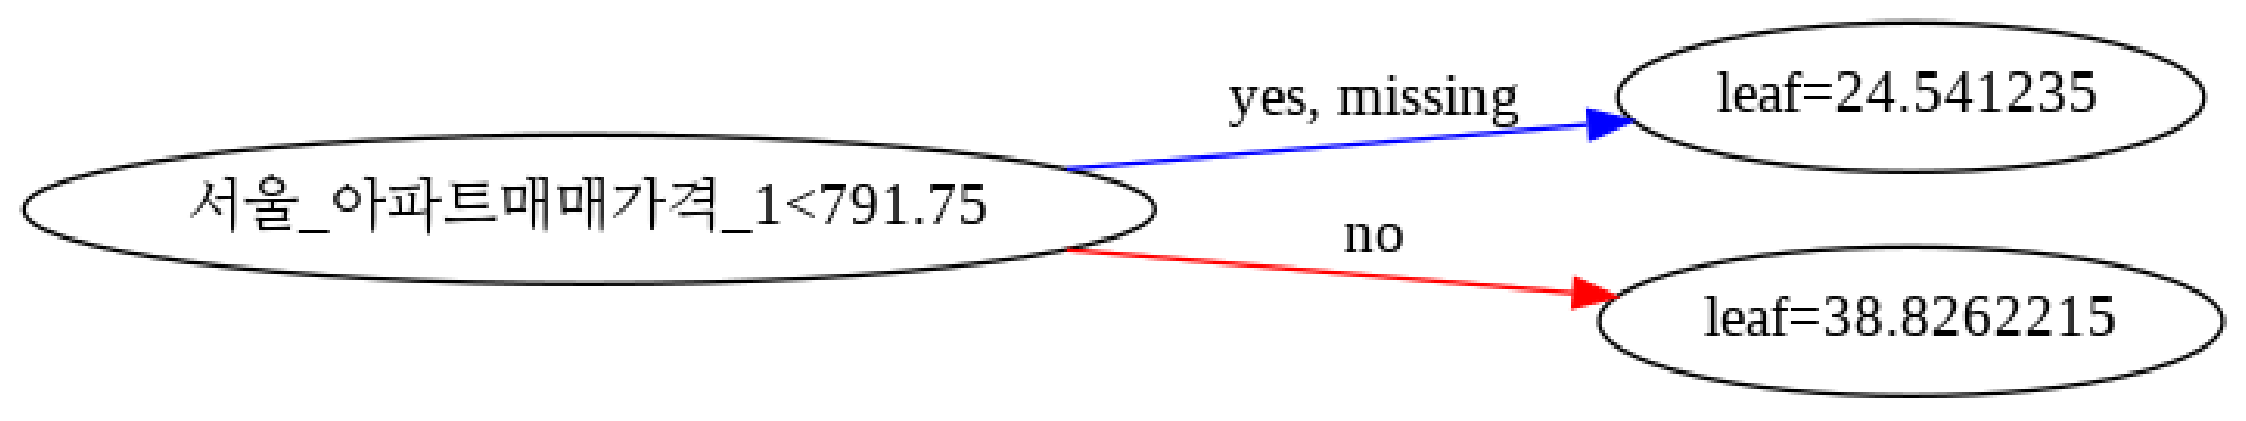

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from xgboost import plot_tree
#plot_tree(XGB_model,num_trees=10)

plot_tree(XGB_model, num_trees=0, rankdir='LR')
plt.show()

In [ ]:
split_date = pd.Timestamp('01-01-2019')
train = df.loc[:split_date]
test = df.loc[split_date:]
len(train), len(test)

(145, 28)

In [ ]:
df.columns

Index(['월별_google_trend', '전국지가지수', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율', '월별 아파트 매매현황(동호수)전국',
       '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '주택인허가실적(전국)', '전국_아파트매매가격', '수도권_아파트매매가격',
       '지방_아파트매매가격', '서울_아파트매매가격', '부산_아파트매매가격', '대구_아파트매매가격', '인천_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격', '강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격',
       '경남_아파트매매가격', '제주_아파트매매가격', '지가지수_전국', '지가지수_서울', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


model_kyungki = RandomForestRegressor(n_estimators=150)


all = ['월별_google_trend', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율',
       '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '주택인허가실적(전국)',
       '서울_아파트매매가격', '부산_아파트매매가격', '대구_아파트매매가격', '인천_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격', '강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격',
       '경남_아파트매매가격', '제주_아파트매매가격', '지가지수_서울', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '지가지수_경북', '지가지수_경남',
       '지가지수_제주', '주택담보대출금리']

train = train[all]
test = test[all]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc= sc.fit_transform(train)
test_sc= sc.transform(test)




train = pd.DataFrame(train_sc,columns=['월별_google_trend', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율',
       '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '주택인허가실적(전국)',
       '서울_아파트매매가격', '부산_아파트매매가격', '대구_아파트매매가격', '인천_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격', '강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격',
       '경남_아파트매매가격', '제주_아파트매매가격', '지가지수_서울', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '지가지수_경북', '지가지수_경남',
       '지가지수_제주', '주택담보대출금리'] , index=train.index)


test = pd.DataFrame(test_sc,columns=['월별_google_trend', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율',
       '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '주택인허가실적(전국)',
       '서울_아파트매매가격', '부산_아파트매매가격', '대구_아파트매매가격', '인천_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격', '강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격',
       '경남_아파트매매가격', '제주_아파트매매가격', '지가지수_서울', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '지가지수_경북', '지가지수_경남',
       '지가지수_제주', '주택담보대출금리'] , index=test.index)


feature = ['월별_google_trend', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율',
       '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '주택인허가실적(전국)',
       '서울_아파트매매가격', '부산_아파트매매가격','대구_아파트매매가격', '인천_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격',
       '경남_아파트매매가격', '제주_아파트매매가격', '지가지수_서울', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '지가지수_경북', '지가지수_경남',
       '지가지수_제주', '주택담보대출금리']

target = ['경기_아파트매매가격']




X_train = train[feature]
y_train = train[target]

X_test = test[feature]
y_test = test[target]

In [ ]:
model_kyungki.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = model_kyungki.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {mae:.2f}')

훈련 에러: 0.01


In [ ]:
y_pred = model_kyungki.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 0.23


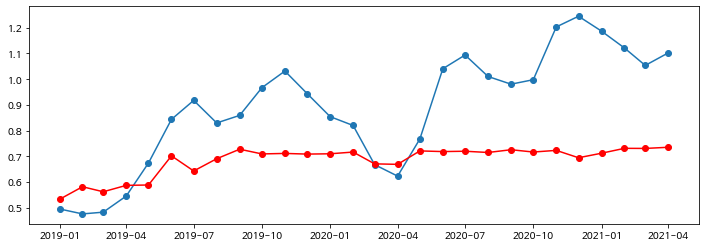

In [ ]:
fig = plt.figure(figsize = (12, 4)) 
y_pred = model_kyungki.predict(X_test)
y_pred2 = pd.DataFrame(y_pred, index=X_test.index)
#pd.DataFrame(train_sc, index=train.index)
#print(y_pred2)
plt.plot(y_test, 'o-', label='Predicted')
#plt.xticks(X_test.index)
plt.plot(y_pred2, 'o-', color='red')

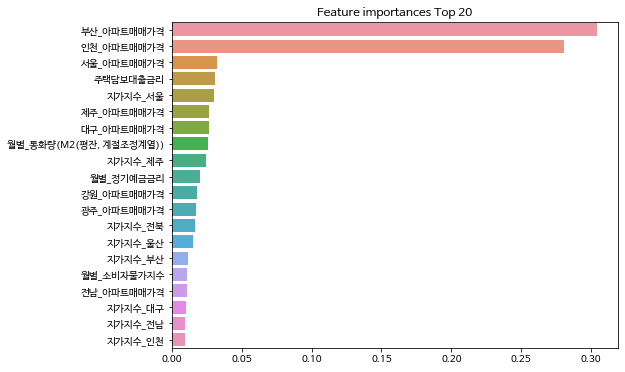

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


importances_values = model_kyungki.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()



---



##XGBoost 통한 강원 아파트 매매가 예측

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124 entries, 2011-01-01 to 2021-04-01
Data columns (total 78 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   전국_세대수                  124 non-null    int64  
 1   서울특별시_세대수               124 non-null    int64  
 2   부산광역시_세대수               124 non-null    int64  
 3   대구광역시_세대수               124 non-null    int64  
 4   인천광역시_세대수               124 non-null    int64  
 5   광주광역시_세대수               124 non-null    int64  
 6   대전광역시_세대수               124 non-null    int64  
 7   울산광역시_세대수               124 non-null    int64  
 8   경기도_세대수                 124 non-null    int64  
 9   강원도_세대수                 124 non-null    int64  
 10  충청북도_세대수                124 non-null    int64  
 11  충청남도_세대수                124 non-null    int64  
 12  전라북도_세대수                124 non-null    int64  
 13  전라남도_세대수                124 non-null    int64  
 14  경상북도_세대수               

In [ ]:
df_Kangwon = df[['강원_아파트매매가격','강원도_세대수','월별_google_trend','지가지수_강원', 
          '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율', '월별 아파트 매매현황(동호수)강원',
        '주택인허가실적(전국)', '주택담보대출금리']]

In [50]:
for s in range(1,7):
    df_Kangwon['강원_아파트매매가격_{}'.format(s)] = df_Kangwon['강원_아파트매매가격'].shift(s)
    df_Kangwon['월별_환율_{}'.format(s)] = df_Kangwon['월별_환율'].shift(s)
    df_Kangwon['월별_google_trend_{}'.format(s)] = df_Kangwon['월별_google_trend'].shift(s)
    df_Kangwon['지가지수_강원_{}'.format(s)] = df_Kangwon['지가지수_강원'].shift(s)
    df_Kangwon['월별_정기예금금리_{}'.format(s)] = df_Kangwon['월별_정기예금금리'].shift(s)
    df_Kangwon['월별_통화량(M2(평잔, 계절조정계열))_{}'.format(s)] = df_Kangwon['월별_통화량(M2(평잔, 계절조정계열))'].shift(s)
    df_Kangwon['월별 아파트 매매현황(동호수)강원_{}'.format(s)] = df_Kangwon['월별 아파트 매매현황(동호수)강원'].shift(s)
    df_Kangwon['주택인허가실적(전국)_{}'.format(s)] = df_Kangwon['주택인허가실적(전국)'].shift(s)
    df_Kangwon['월별_소비자물가지수_{}'.format(s)] = df_Kangwon['월별_소비자물가지수'].shift(s)
    df_Kangwon['주택담보대출금리_{}'.format(s)] = df_Kangwon['주택담보대출금리'].shift(s)
    df_Kangwon['강원도_세대수_{}'.format(s)] = df_Kangwon['강원도_세대수'].shift(s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [51]:
split_date = pd.Timestamp('01-01-2021')
train = df_Kangwon.loc[:split_date]
test = df_Kangwon.loc[split_date:]

In [52]:
X_train = train.dropna().drop('강원_아파트매매가격', axis=1)
y_train = train.dropna()[['강원_아파트매매가격']]


X_train = X_train.dropna().drop('월별_환율', axis=1)
X_train = X_train.dropna().drop('월별_google_trend', axis=1)
X_train = X_train.dropna().drop('지가지수_강원', axis=1)
X_train = X_train.dropna().drop('월별_정기예금금리', axis=1)
X_train = X_train.dropna().drop('월별_소비자물가지수', axis=1)
X_train = X_train.dropna().drop('월별_통화량(M2(평잔, 계절조정계열))', axis=1)
X_train = X_train.dropna().drop('월별 아파트 매매현황(동호수)강원', axis=1)
X_train = X_train.dropna().drop('주택인허가실적(전국)', axis=1)
X_train = X_train.dropna().drop('주택담보대출금리', axis=1)
X_train = X_train.dropna().drop('강원도_세대수', axis=1)


X_test = test.dropna().drop('강원_아파트매매가격', axis=1)
y_test = test.dropna()[['강원_아파트매매가격']]


X_test = X_test.dropna().drop('월별_환율', axis=1)
X_test = X_test.dropna().drop('월별_google_trend', axis=1)
X_test = X_test.dropna().drop('지가지수_강원', axis=1)
X_test = X_test.dropna().drop('월별_정기예금금리', axis=1)
X_test = X_test.dropna().drop('월별_소비자물가지수', axis=1)
X_test = X_test.dropna().drop('월별_통화량(M2(평잔, 계절조정계열))', axis=1)
X_test = X_test.dropna().drop('월별 아파트 매매현황(동호수)강원', axis=1)
X_test = X_test.dropna().drop('주택인허가실적(전국)', axis=1)
X_test = X_test.dropna().drop('주택담보대출금리', axis=1)
X_test = X_test.dropna().drop('강원도_세대수', axis=1)

In [53]:
XGB_model = XGBRegressor(objective = 'reg:linear',
                         n_estimators=10000,learning_rate=0.04,max_depth=4
                    #  learning_rate=0.2, max_depth=4,
                      ,subsample=0.7
                      ,colsample_bytree = 0.7)

In [54]:
# xgb 활용
XGB_model.fit(X_train, y_train)

[06:08:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.04, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)

In [55]:
from sklearn.metrics import mean_absolute_error
y_pred = XGB_model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'xgb 훈련 에러: {mae:.2f}')

xgb 훈련 에러: 0.00


In [56]:
y_pred_XGB = XGB_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_XGB)
print(f'xgb 테스트 에러: {mae:.2f}')

xgb 테스트 에러: 5.33


In [57]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_test, y_pred_XGB)**0.5
print(f'xgb 테스트 RMSE: {RMSE:.2f}')

xgb 테스트 RMSE: 6.56


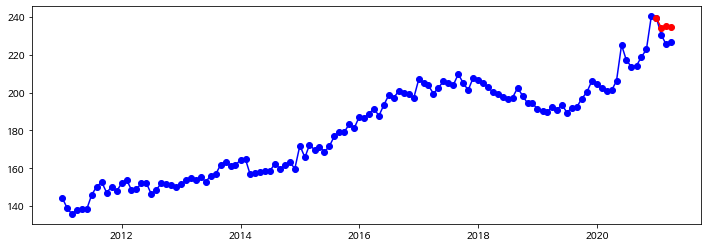

In [58]:
fig = plt.figure(figsize = (12, 4)) 
y_pred = XGB_model.predict(X_test)
y_pred = pd.DataFrame(y_pred, index=X_test.index)
#pd.DataFrame(train_sc, index=train.index)
#print(y_pred2)
plt.plot(df_Kangwon['강원_아파트매매가격'], 'o-', label='real_value',color='blue')
#plt.xticks(X_test.index)
plt.plot(y_pred, 'o-', label='predicted',color='red')

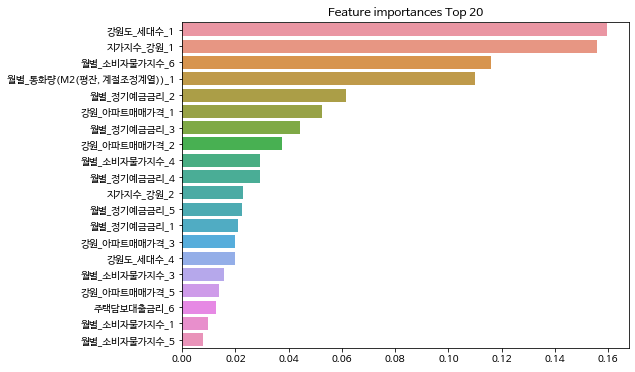

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns


importances_values = XGB_model.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

In [60]:
!pip install eli5

In [61]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(XGB_model).fit(X_test, y_test) 
eli5.show_weights(perm, top = 20, feature_names = X_test.columns.tolist())

Weight,Feature
0.2919 ± 0.4399,월별_정기예금금리_1
0.0805 ± 0.0903,주택담보대출금리_6
0.0600 ± 0.1471,월별_소비자물가지수_4
0.0390 ± 0.0457,주택담보대출금리_3
0.0272 ± 0.0647,주택인허가실적(전국)_4
0.0123 ± 0.0190,주택인허가실적(전국)_3
0.0113 ± 0.0511,월별_google_trend_1
0.0103 ± 0.0310,월별 아파트 매매현황(동호수)강원_5
0.0081 ± 0.0321,주택인허가실적(전국)_5
0.0071 ± 0.0186,월별_환율_5


In [62]:
split_date = pd.Timestamp('01-01-2019')

train = df.loc[:split_date]
test = df.loc[split_date:]
len(train), len(test)

(97, 28)

In [ ]:
df.columns

Index(['월별_google_trend', '전국지가지수', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율', '월별 아파트 매매현황(동호수)전국',
       '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '주택인허가실적(전국)', '전국_아파트매매가격', '수도권_아파트매매가격',
       '지방_아파트매매가격', '서울_아파트매매가격', '부산_아파트매매가격', '대구_아파트매매가격', '인천_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격', '강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격',
       '경남_아파트매매가격', '제주_아파트매매가격', '지가지수_전국', '지가지수_서울', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


model_incheon = RandomForestRegressor(n_estimators=150)


all = ['월별_google_trend', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율',
       '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '주택인허가실적(전국)',
       '서울_아파트매매가격', '부산_아파트매매가격', '대구_아파트매매가격', '인천_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격', '강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격',
       '경남_아파트매매가격', '제주_아파트매매가격', '지가지수_서울', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '지가지수_경북', '지가지수_경남',
       '지가지수_제주', '주택담보대출금리']

train = train[all]
test = test[all]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc= sc.fit_transform(train)
test_sc= sc.transform(test)




train = pd.DataFrame(train_sc,columns=['월별_google_trend', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율',
       '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '주택인허가실적(전국)',
       '서울_아파트매매가격', '부산_아파트매매가격', '대구_아파트매매가격', '인천_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격', '강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격',
       '경남_아파트매매가격', '제주_아파트매매가격', '지가지수_서울', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '지가지수_경북', '지가지수_경남',
       '지가지수_제주', '주택담보대출금리'] , index=train.index)


test = pd.DataFrame(test_sc,columns=['월별_google_trend', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율',
       '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '주택인허가실적(전국)',
       '서울_아파트매매가격', '부산_아파트매매가격', '대구_아파트매매가격', '인천_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격', '강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격',
       '경남_아파트매매가격', '제주_아파트매매가격', '지가지수_서울', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '지가지수_경북', '지가지수_경남',
       '지가지수_제주', '주택담보대출금리'] , index=test.index)


feature = ['월별_google_trend', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율',
       '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '주택인허가실적(전국)',
       '서울_아파트매매가격', '부산_아파트매매가격','대구_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격','강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격',
       '경남_아파트매매가격', '제주_아파트매매가격', '지가지수_서울', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '지가지수_경북', '지가지수_경남',
       '지가지수_제주', '주택담보대출금리']

target = ['인천_아파트매매가격']




X_train = train[feature]
y_train = train[target]

X_test = test[feature]
y_test = test[target]

In [ ]:
model_incheon.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = model_incheon.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {mae:.2f}')

훈련 에러: 0.01


In [ ]:
y_pred = model_incheon.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 0.20


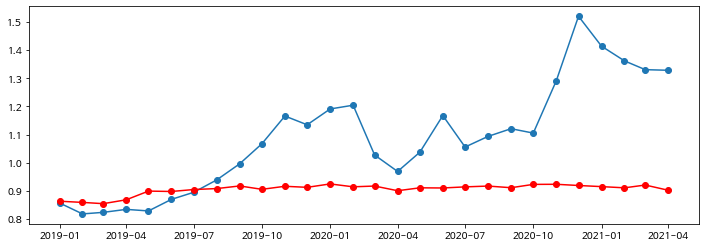

In [ ]:
fig = plt.figure(figsize = (12, 4)) 
y_pred = model_incheon.predict(X_test)
y_pred2 = pd.DataFrame(y_pred, index=X_test.index)
#pd.DataFrame(train_sc, index=train.index)
#print(y_pred2)
plt.plot(y_test, 'o-', label='Predicted')
#plt.xticks(X_test.index)
plt.plot(y_pred2, 'o-', color='red')

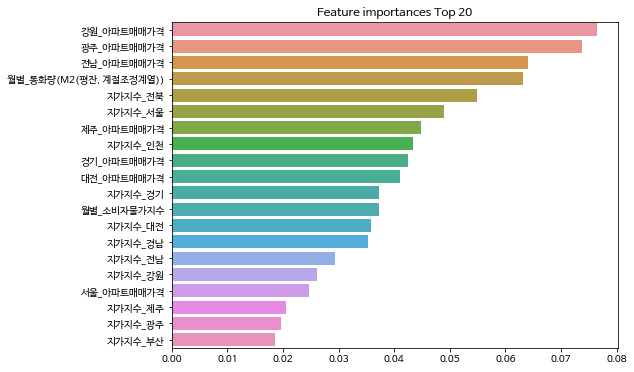

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


importances_values =model_incheon.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()



---





---



## XGB, 랜덤포레스트, 전국 아파트 매매가 예측

In [43]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

### Train, Test


In [79]:
split_date = pd.Timestamp('01-01-2021')
df_lstm = df[['전국_아파트매매가격','전국_세대수','월별_google_trend','전국지가지수', 
          '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율', '월별 아파트 매매현황(동호수)전국',
        '주택인허가실적(전국)', '주택담보대출금리']]

In [80]:
for s in range(1,7):
    df_lstm['전국_아파트매매가격_{}'.format(s)] = df_lstm['전국_아파트매매가격'].shift(s)
    df_lstm['월별_환율_{}'.format(s)] = df_lstm['월별_환율'].shift(s)
    df_lstm['월별_google_trend_{}'.format(s)] = df_lstm['월별_google_trend'].shift(s)
    df_lstm['전국지가지수_{}'.format(s)] = df_lstm['전국지가지수'].shift(s)
    df_lstm['월별_정기예금금리_{}'.format(s)] = df_lstm['월별_정기예금금리'].shift(s)
    df_lstm['월별_통화량(M2(평잔, 계절조정계열))_{}'.format(s)] = df_lstm['월별_통화량(M2(평잔, 계절조정계열))'].shift(s)
    df_lstm['월별 아파트 매매현황(동호수)전국_{}'.format(s)] = df_lstm['월별 아파트 매매현황(동호수)전국'].shift(s)
    df_lstm['주택인허가실적(전국)_{}'.format(s)] = df_lstm['주택인허가실적(전국)'].shift(s)
    df_lstm['월별_소비자물가지수_{}'.format(s)] = df_lstm['월별_소비자물가지수'].shift(s)
    df_lstm['주택담보대출금리_{}'.format(s)] = df_lstm['주택담보대출금리'].shift(s)
    df_lstm['전국_세대수_{}'.format(s)] = df_lstm['전국_세대수'].shift(s)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [81]:
df_lstm

,전국_아파트매매가격,전국_세대수,월별_google_trend,전국지가지수,월별_정기예금금리,월별_소비자물가지수,"월별_통화량(M2(평잔, 계절조정계열))",월별_환율,월별 아파트 매매현황(동호수)전국,주택인허가실적(전국),주택담보대출금리,전국_아파트매매가격_1,월별_환율_1,월별_google_trend_1,전국지가지수_1,월별_정기예금금리_1,"월별_통화량(M2(평잔, 계절조정계열))_1",월별 아파트 매매현황(동호수)전국_1,주택인허가실적(전국)_1,월별_소비자물가지수_1,주택담보대출금리_1,전국_세대수_1,전국_아파트매매가격_2,월별_환율_2,월별_google_trend_2,전국지가지수_2,월별_정기예금금리_2,"월별_통화량(M2(평잔, 계절조정계열))_2",월별 아파트 매매현황(동호수)전국_2,주택인허가실적(전국)_2,월별_소비자물가지수_2,주택담보대출금리_2,전국_세대수_2,전국_아파트매매가격_3,월별_환율_3,월별_google_trend_3,전국지가지수_3,월별_정기예금금리_3,"월별_통화량(M2(평잔, 계절조정계열))_3",월별 아파트 매매현황(동호수)전국_3,주택인허가실적(전국)_3,월별_소비자물가지수_3,주택담보대출금리_3,전국_세대수_3,전국_아파트매매가격_4,월별_환율_4,월별_google_trend_4,전국지가지수_4,월별_정기예금금리_4,"월별_통화량(M2(평잔, 계절조정계열))_4",월별 아파트 매매현황(동호수)전국_4,주택인허가실적(전국)_4,월별_소비자물가지수_4,주택담보대출금리_4,전국_세대수_4,전국_아파트매매가격_5,월별_환율_5,월별_google_trend_5,전국지가지수_5,월별_정기예금금리_5,"월별_통화량(M2(평잔, 계절조정계열))_5",월별 아파트 매매현황(동호수)전국_5,주택인허가실적(전국)_5,월별_소비자물가지수_5,주택담보대출금리_5,전국_세대수_5,전국_아파트매매가격_6,월별_환율_6,월별_google_trend_6,전국지가지수_6,월별_정기예금금리_6,"월별_통화량(M2(평잔, 계절조정계열))_6",월별 아파트 매매현황(동호수)전국_6,주택인허가실적(전국)_6,월별_소비자물가지수_6,주택담보대출금리_6,전국_세대수_6
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01,286.6,19869849,51,78.184,3.46,93.070,1674184.6,1114.3,53791,18500,4.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-01,271.1,19891086,43,78.254,3.63,93.707,1675055.2,1127.9,60619,19176,4.86,286.6,1114.3,51.0,78.184,3.46,1674184.6,53791.0,18500.0,93.070,4.80,19869849.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-01,254.8,19906696,34,78.338,3.66,94.072,1679087.2,1107.2,71577,32853,4.89,271.1,1127.9,43.0,78.254,3.63,1675055.2,60619.0,19176.0,93.707,4.86,19891086.0,286.6,1114.3,51.0,78.184,3.46,1674184.6,53791.0,18500.0,93.070,4.80,19869849.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-01,249.6,19923412,37,78.415,3.69,94.163,1686110.4,1072.3,65139,41156,4.88,254.8,1107.2,34.0,78.338,3.66,1679087.2,71577.0,32853.0,94.072,4.89,19906696.0,271.1,1127.9,43.0,78.254,3.63,1675055.2,60619.0,19176.0,93.707,4.86,19891086.0,286.6,1114.3,51.0,78.184,3.46,1674184.6,53791.0,18500.0,93.070,4.80,19869849.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-05-01,255.4,19935590,37,78.491,3.67,94.345,1694221.7,1080.6,59403,32716,4.90,249.6,1072.3,37.0,78.415,3.69,1686110.4,65139.0,41156.0,94.163,4.88,19923412.0,254.8,1107.2,34.0,78.338,3.66,1679087.2,71577.0,32853.0,94.072,4.89,19906696.0,271.1,1127.9,43.0,78.254,3.63,1675055.2,60619.0,19176.0,93.707,4.86,19891086.0,286.6,1114.3,51.0,78.184,3.46,1674184.6,53791.0,18500.0,93.07,4.80,19869849.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,491.3,23093108,37,101.268,0.89,105.670,3191519.6,1088.0,106027,96803,2.59,471.7,1104.4,40.0,100.922,0.89,3178652.3,89660.0,34474.0,105.500,2.56,23037033.0,453.3,1133.4,35.0,100.598,0.87,3151288.9,66174.0,33257.0,105.610,2.47,22991110.0,448.4,1173.5,31.0,100.303,0.87,3119022.8,58037.0,35686.0,106.200,2.44,22952513.0,472.9,1185.1,37.0,100.000,0.80,3105178.6,59429.0,28268.0,105.50,2.39,22898959.0,516.2,1191.4,46.0,99.689,0.80,3093227.7,102628.0,40178.

In [82]:
train = df_lstm.loc[:split_date]
test = df_lstm.loc[split_date:]
print(train.shape), print((test.shape))

(121, 77)
(4, 77)


(None, None)

In [83]:
train.tail(5)

,전국_아파트매매가격,전국_세대수,월별_google_trend,전국지가지수,월별_정기예금금리,월별_소비자물가지수,"월별_통화량(M2(평잔, 계절조정계열))",월별_환율,월별 아파트 매매현황(동호수)전국,주택인허가실적(전국),주택담보대출금리,전국_아파트매매가격_1,월별_환율_1,월별_google_trend_1,전국지가지수_1,월별_정기예금금리_1,"월별_통화량(M2(평잔, 계절조정계열))_1",월별 아파트 매매현황(동호수)전국_1,주택인허가실적(전국)_1,월별_소비자물가지수_1,주택담보대출금리_1,전국_세대수_1,전국_아파트매매가격_2,월별_환율_2,월별_google_trend_2,전국지가지수_2,월별_정기예금금리_2,"월별_통화량(M2(평잔, 계절조정계열))_2",월별 아파트 매매현황(동호수)전국_2,주택인허가실적(전국)_2,월별_소비자물가지수_2,주택담보대출금리_2,전국_세대수_2,전국_아파트매매가격_3,월별_환율_3,월별_google_trend_3,전국지가지수_3,월별_정기예금금리_3,"월별_통화량(M2(평잔, 계절조정계열))_3",월별 아파트 매매현황(동호수)전국_3,주택인허가실적(전국)_3,월별_소비자물가지수_3,주택담보대출금리_3,전국_세대수_3,전국_아파트매매가격_4,월별_환율_4,월별_google_trend_4,전국지가지수_4,월별_정기예금금리_4,"월별_통화량(M2(평잔, 계절조정계열))_4",월별 아파트 매매현황(동호수)전국_4,주택인허가실적(전국)_4,월별_소비자물가지수_4,주택담보대출금리_4,전국_세대수_4,전국_아파트매매가격_5,월별_환율_5,월별_google_trend_5,전국지가지수_5,월별_정기예금금리_5,"월별_통화량(M2(평잔, 계절조정계열))_5",월별 아파트 매매현황(동호수)전국_5,주택인허가실적(전국)_5,월별_소비자물가지수_5,주택담보대출금리_5,전국_세대수_5,전국_아파트매매가격_6,월별_환율_6,월별_google_trend_6,전국지가지수_6,월별_정기예금금리_6,"월별_통화량(M2(평잔, 계절조정계열))_6",월별 아파트 매매현황(동호수)전국_6,주택인허가실적(전국)_6,월별_소비자물가지수_6,주택담보대출금리_6,전국_세대수_6
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-09-01,448.4,22952513,31,100.303,0.87,106.20,3119022.8,1173.5,58037,35686,2.44,472.9,1185.1,37.0,100.000,0.80,3105178.6,59429.0,28268.0,105.50,2.39,22898959.0,516.2,1191.4,46.0,99.689,0.80,3093227.7,102628.0,40178.0,104.86,2.45,22842044.0,532.6,1200.7,36.0,99.359,0.88,3074375.1,102482.0,33079.0,104.87,2.49,22791531.0,418.8,1239.4,32.0,99.063,1.07,3051094.3,57426.0,28279.0,104.71,2.52,22732288.0,369.3,1225.2,29.0,98.809,1.22,3019601.5,48972.0,31884.0,104.95,2.58,22663240.0,394.7,1222.6,30.0,98.577,1.26,2982746.6,79615.0,33648.0,105.54,2.48,22613882.0
2020-10-01,453.3,22991110,35,100.598,0.87,105.61,3151288.9,1133.4,66174,33257,2.47,448.4,1173.5,31.0,100.303,0.87,3119022.8,58037.0,35686.0,106.20,2.44,22952513.0,472.9,1185.1,37.0,100.000,0.80,3105178.6,59429.0,28268.0,105.50,2.39,22898959.0,516.2,1191.4,46.0,99.689,0.80,3093227.7,102628.0,40178.0,104.86,2.45,22842044.0,532.6,1200.7,36.0,99.359,0.88,3074375.1,102482.0,33079.0,104.87,2.49,22791531.0,418.8,1239.4,32.0,99.063,1.07,3051094.3,57426.0,28279.0,104.71,2.52,22732288.0,369.3,1225.2,29.0,98.809,1.22,3019601.5,48972.0,31884.0,104.95,2.58,22663240.0
2020-11-01,471.7,23037033,40,100.922,0.89,105.50,3178652.3,1104.4,89660,34474,2.56,453.3,1133.4,35.0,100.598,0.87,3151288.9,66174.0,33257.0,105.61,2.47,22991110.0,448.4,1173.5,31.0,100.303,0.87,3119022.8,58037.0,35686.0,106.20,2.44,22952513.0,472.9,1185.1,37.0,100.000,0.80,3105178.6,59429.0,28268.0,105.50,2.39,22898959.0,516.2,1191.4,46.0,99.689,0.80,3093227.7,102628.0,40178.0,104.86,2.45,22842044.0,532.6,1200.7,36.0,99.359,0.88,3074375.1,102482.0,33079.0,104.87,2.49,22791531.0,418.8,1239.4,32.0,99.063,1.07,3051094.3,57426.0,28279.0,104.71,2.52,22732288.0
2020-12-01,491.3,23093108,37,101.268,0.89,105.67,3191519.6,1088.0,106027,96803,2.59,471.7,1104.4,40.0,100.922,0.89,3178652.3,89660.0,34474.0,105.50,2.56,23037033.0,453.3,1133.4,35.0,100.598,0.87,3151288.9,66174.0,33257.0,105.61,2.47,22991110.0,448.4,1173.5,31.0,100.303,0.87,3119022.8,58037.0,35686.0,106.20,2.44,22952513.0,472.9,1185.1,37.0,100.000,0.80,3105178.6,59429.0,28268.0,105.50,2.39,22898959.0,516.2,1191.4,46.0,99.689,0.80,3093227.7,102628.0,40178.0,104.86,2.45,22842044.0,532.6,1200.7,36.0,99.359,0.88,3074375.1,102482.0,33079.0,104.87,2.49,22791531.0
2021-01-01,490.9,23137172,41,101.583,0.85,106.47,3232659.8,1114.6,64371,26183,2.63,491.3,1088.0,37.0,101.268,0.89,3191519.6,106027.0,96803.0,105.67,2.59,23093108.0,471.7,1104.4,40.0,100.922,0.89,3178652.3,89660.0,34474.0,105.50,2.56,23037033.0,453.3,1133.4,35.0,100.598,0.87,3151288.9,66174.0,33257.0,105.61,2.47,22991110.0,448.4,1173.5,31.0,100.303,0.87,3119022.8,58037.0,35686.0,106.20,2.44,22952513.0,472.9,1185.1,37.0,100.000,0.80,3105178.6,59429.0,28268.0,105.50,2.39,22898959.0,516.2,1191.4,46.0,99.689,0.80,3093227.7,102628.0,40178.0,104.86,2.45,22842044.0


In [84]:
X_train = train.dropna().drop('전국_아파트매매가격', axis=1)
y_train = train.dropna()[['전국_아파트매매가격']]


X_train = X_train.dropna().drop('월별_환율', axis=1)
X_train = X_train.dropna().drop('월별_google_trend', axis=1)
X_train = X_train.dropna().drop('전국지가지수', axis=1)
X_train = X_train.dropna().drop('월별_정기예금금리', axis=1)
X_train = X_train.dropna().drop('월별_소비자물가지수', axis=1)
X_train = X_train.dropna().drop('월별_통화량(M2(평잔, 계절조정계열))', axis=1)
X_train = X_train.dropna().drop('월별 아파트 매매현황(동호수)전국', axis=1)
X_train = X_train.dropna().drop('주택인허가실적(전국)', axis=1)
X_train = X_train.dropna().drop('주택담보대출금리', axis=1)
X_train = X_train.dropna().drop('전국_세대수', axis=1)


X_test = test.dropna().drop('전국_아파트매매가격', axis=1)
y_test = test.dropna()[['전국_아파트매매가격']]


X_test = X_test.dropna().drop('월별_환율', axis=1)
X_test = X_test.dropna().drop('월별_google_trend', axis=1)
X_test = X_test.dropna().drop('전국지가지수', axis=1)
X_test = X_test.dropna().drop('월별_정기예금금리', axis=1)
X_test = X_test.dropna().drop('월별_소비자물가지수', axis=1)
X_test = X_test.dropna().drop('월별_통화량(M2(평잔, 계절조정계열))', axis=1)
X_test = X_test.dropna().drop('월별 아파트 매매현황(동호수)전국', axis=1)
X_test = X_test.dropna().drop('주택인허가실적(전국)', axis=1)
X_test = X_test.dropna().drop('주택담보대출금리', axis=1)
X_test = X_test.dropna().drop('전국_세대수', axis=1)


In [550]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115 entries, 2011-07-01 to 2021-01-01
Data columns (total 66 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   전국_아파트매매가격_1              115 non-null    float64
 1   월별_환율_1                   115 non-null    float64
 2   월별_google_trend_1         115 non-null    float64
 3   전국지가지수_1                  115 non-null    float64
 4   월별_정기예금금리_1               115 non-null    float64
 5   월별_통화량(M2(평잔, 계절조정계열))_1  115 non-null    float64
 6   월별 아파트 매매현황(동호수)전국_1      115 non-null    float64
 7   주택인허가실적(전국)_1             115 non-null    float64
 8   월별_소비자물가지수_1              115 non-null    float64
 9   주택담보대출금리_1                115 non-null    float64
 10  전국_세대수_1                  115 non-null    float64
 11  전국_아파트매매가격_2              115 non-null    float64
 12  월별_환율_2                   115 non-null    float64
 13  월별_google_trend_2         115 non-null    floa

In [ ]:
XGB_model = XGBRegressor(objective = 'reg:linear',
                         n_estimators=15000,
                     learning_rate=0.04, max_depth=5,
                     subsample=0.8,
                     colsample_bytree = 0.8)

In [99]:
XGB_model = NGBRegressor(col_sample=0.7,
                         n_estimators=10000,
                     learning_rate=0.07)
                  

In [100]:
# xgb 활용
XGB_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[iter 0] loss=5.7294 val_loss=0.0000 scale=1.0000 norm=62.3608
[iter 100] loss=1.0091 val_loss=0.0000 scale=2.0000 norm=1.5534
[iter 200] loss=-0.2174 val_loss=0.0000 scale=1.0000 norm=0.3407
[iter 300] loss=-0.9841 val_loss=0.0000 scale=1.0000 norm=0.2469
[iter 400] loss=-1.5626 val_loss=0.0000 scale=0.5000 norm=0.1036
[iter 500] loss=-2.1099 val_loss=0.0000 scale=1.0000 norm=0.1879
[iter 600] loss=-2.4945 val_loss=0.0000 scale=0.2500 norm=0.0482
[iter 700] loss=-2.8138 val_loss=0.0000 scale=0.1250 norm=0.0243
[iter 800] loss=-3.0972 val_loss=0.0000 scale=0.1250 norm=0.0237
[iter 900] loss=-3.3155 val_loss=0.0000 scale=0.0005 norm=0.0001
[iter 1000] loss=-3.5146 val_loss=0.0000 scale=0.0078 norm=0.0016
[iter 1100] loss=-3.5974 val_loss=0.0000 scale=0.0312 norm=0.0062
[iter 1200] loss=-3.6827 val_loss=0.0000 scale=0.0625 norm=0.0129
[iter 1300] loss=-3.8222 val_loss=0.0000 scale=0.1250 norm=0.0253
[iter 1400] loss=-3.9097 val_loss=0.0000 scale=0.0005 norm=0.0001
[iter 1500] loss=-3.953

NGBRegressor(Base=DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse',
                                        max_depth=3, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.LogScore'>, col_sample=0.7,
             learning_rate=0.07, minibatch_frac=1.0, n_estimators=10000,
             natural_gradient=True,
             random_state=RandomState(MT19937) at 0x7FA83A581050, tol=0.0001,
             verbose=True, verbose_eval=100)

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


Cat_model = CatBoostRegressor(n_estimators=1000,
                     learning_rate=0.2)

In [92]:
Cat_model.fit(X_train, y_train)

0:	learn: 65.0487494	total: 8.74ms	remaining: 8.73s
1:	learn: 56.4045026	total: 16.1ms	remaining: 8.04s
2:	learn: 49.8512780	total: 23.6ms	remaining: 7.85s
3:	learn: 44.6706559	total: 30.8ms	remaining: 7.68s
4:	learn: 39.9933726	total: 38.2ms	remaining: 7.61s
5:	learn: 35.9607239	total: 45.2ms	remaining: 7.5s
6:	learn: 33.3674803	total: 52.7ms	remaining: 7.48s
7:	learn: 31.6415032	total: 54.2ms	remaining: 6.71s
8:	learn: 28.7726744	total: 61.7ms	remaining: 6.79s
9:	learn: 27.3186728	total: 69.3ms	remaining: 6.87s
10:	learn: 25.7083878	total: 76.7ms	remaining: 6.9s
11:	learn: 23.9582487	total: 85.2ms	remaining: 7.02s
12:	learn: 22.4863312	total: 92.9ms	remaining: 7.05s
13:	learn: 21.0814944	total: 100ms	remaining: 7.07s
14:	learn: 20.0815749	total: 108ms	remaining: 7.1s
15:	learn: 19.0766560	total: 116ms	remaining: 7.16s
16:	learn: 18.1952697	total: 124ms	remaining: 7.16s
17:	learn: 16.9563940	total: 131ms	remaining: 7.16s
18:	learn: 16.3991912	total: 139ms	remaining: 7.17s
19:	learn: 1

In [553]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

rf_model= RandomForestRegressor(n_estimators=10000)

In [554]:
rf_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [555]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_pred_rf = rf_model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred_rf)
print(f'rf 훈련 에러: {mae:.2f}')

rf 훈련 에러: 5.97


In [556]:
from sklearn.metrics import mean_absolute_error

y_pred_rf = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_rf)
print(f'rf 테스트 에러: {mae:.2f}')

rf 테스트 에러: 10.43


In [557]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_test, y_pred_rf)**0.5
print(f'rf 테스트 RMSE: {RMSE:.2f}')

rf 테스트 RMSE: 11.86


In [101]:
from sklearn.metrics import mean_absolute_error
y_pred = XGB_model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'xgb 훈련 에러: {mae:.2f}')

xgb 훈련 에러: 0.00


In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = Cat_model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'cat 훈련 에러: {mae:.2f}')

In [103]:

y_pred_XGB = XGB_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_XGB)
print(f'xgb 테스트 에러: {mae:.2f}')

xgb 테스트 에러: 8.73


In [136]:
y_pred_cat = Cat_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_cat)
print(f'cat 테스트 에러: {mae:.2f}')

cat 테스트 에러: 6.91


In [94]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_test, y_pred_XGB)**0.5
print(f'xgb 테스트 RMSE: {RMSE:.2f}')

xgb 테스트 RMSE: 17.47


In [103]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_test, y_pred_cat)**0.5
print(f'cat 테스트 RMSE: {RMSE:.2f}')

cat 테스트 RMSE: 9.64


### 예측 시각화

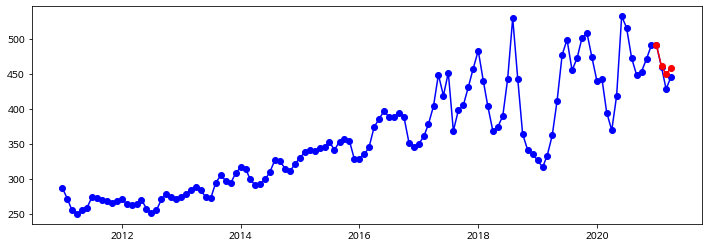

In [104]:
fig = plt.figure(figsize = (12, 4)) 
y_pred = XGB_model.predict(X_test)
y_pred = pd.DataFrame(y_pred, index=X_test.index)
#pd.DataFrame(train_sc, index=train.index)
#print(y_pred2)
plt.plot(df_lstm['전국_아파트매매가격'], 'o-', label='real_value',color='blue')
#plt.xticks(X_test.index)
plt.plot(y_pred, 'o-', label='predicted',color='red')

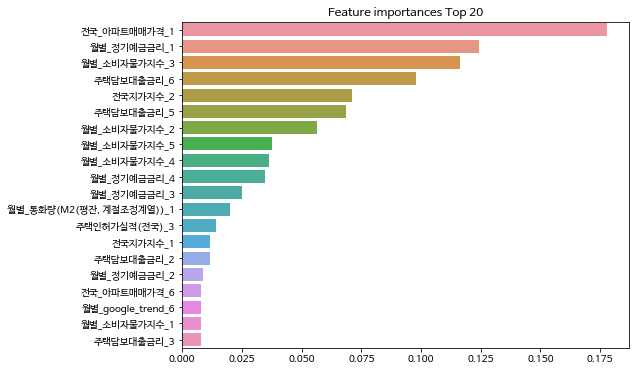

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns


importances_values = XGB_model.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

In [ ]:
!pip install eli5

In [231]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(XGB_model, random_state = 42).fit(X_test, y_test) 
eli5.show_weights(perm, top = 20, feature_names = X_test.columns.tolist())

Weight,Feature
0.7348 ± 1.2038,주택인허가실적(전국)_3
0.1769 ± 0.0351,전국_아파트매매가격_1
0.0409 ± 0.0783,월별_소비자물가지수_2
0.0375 ± 0.0409,주택인허가실적(전국)_4
0.0311 ± 0.0535,월별_소비자물가지수_1
0.0179 ± 0.0355,전국_아파트매매가격_2
0.0091 ± 0.0229,월별_환율_3
0.0089 ± 0.0113,월별_정기예금금리_2
0.0060 ± 0.0352,주택인허가실적(전국)_2
0.0031 ± 0.0119,전국_아파트매매가격_3
